In [ ]:
from mxnet import ndarray as nd
from mxnet import gluon
from mxnet import autograd
import numpy as np

# 创建数据集
num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

x = nd.random_normal(shape=(num_train + num_test, 1))
X = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * X[:,0] + true_w[1] * X[:,1] + \
    true_w[2] * X[:,2]
y += y + nd.random_normal(shape=y.shape)

X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

In [118]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

# 测试函数
def test(net, X, y):
    return square_loss(net(X), y).mean().asscalar()

# 训练函数
def train(X_train, X_test, y_train, y_test):
   
    # 设置训练参数
    learning_rate = 0.01
    epochs = 100
    batch_size = 1

    # 1. 建立模型容器Sequential
    net = gluon.nn.Sequential()
    # 2. 在容器Suquential域名内，添加网络层
    with net.name_scope():
        #net.add(gluon.nn.Dense(256, activation = 'relu')) # 输出为1的单层网络，即线性模型
        #net.add(gluon.nn.Dense(64, activation = 'relu'))
        net.add(gluon.nn.Dense(1))
    # 3. 模型容器Sequential初始化
    net.initialize()
    # 4. 建立损失函数：实例化L2损失函数
    square_loss = gluon.loss.L2Loss()
    # 5. 建立优化器：实例化梯度求解器
    trainer = gluon.Trainer(net.collect_params(), 'sgd', \
                            {'learning_rate': learning_rate})
    
    
    # 格式化数据集
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(dataset_train, \
                                             batch_size, shuffle = True)
    # 统计loss值    
    train_loss = []
    test_loss = []
    
    # 迭代epochs次
    for epoch in range(epochs):
        
        '''
        # test
        loss_cnt = 0
        cnt = 0
        loss_vec = []
        '''
                
        # 遍历数据集
        for data, label in data_iter_train:
            # test
            #cnt += 1
            
            # 计算梯度
            with autograd.record():
                output = net(data)
                #print('output is: ', output)
                loss = square_loss(output, label)
                #print('loss is: ', loss)
            # 反向传播
            loss.backward()
            
            #print('net.weight.data is: ', net[0].weight.data())
            
            
            trainer.step(batch_size)  #针对batch个数据随机梯度下降，更新一次数据
            
            #print('net[0].weight.data is: ', net[0].weight.data())
            '''
            # test
            if loss_cnt == 0:
                print('type of loss is: ',type(loss), '\nloss equals: ', loss)
            loss_cnt += loss
            loss_vec.append(loss.asscalar())
            '''       
       
        # 迭代后，向量计算的loss，与迭代中累计的loss对比下
        epoch_loss = square_loss(net(X_train), y_train).mean().asscalar()
                
        '''
        # test
        print('*' * 25)
        ave_loss = loss_cnt / cnt
        print('batch_size is: ', batch_size)
        print('cnt is: ', cnt)
        
        print('len of data_iter is: ', len(data_iter_train))
        #print('shape of data_iter is: ', data_iter_train.shape)        
        print('\nepoch_loss is: ', epoch_loss)
        print('loss_cnt/cnt is: ', ave_loss)
        print('\nloss_vec.mean() is: %s ' % np.mean(loss_vec))        
        print('loss_vec.sum() is: ', np.sum(loss_vec))        
        print('net is: ', net, '\nnet[0] is: ', net[0])
        '''
                
        train_loss.append(epoch_loss)
        test_loss.append(square_loss(net(X_test), y_test).mean().asscalar())
    
    print('*' * 100 + '\ntrain_Loss is: ', train_loss)
    print('*' * 100 + '\ntest_loss is: ', test_loss)
    
    print('*' * 100)
    print('true_w is: ', true_w)
    print('true_b is: ', true_b)
    print('learned weight', net[0].weight.data(), '\nlearned bias', net[0].bias.data())
    
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    
    
    
    return ('learned weight', net[0].weight.data(), 'learned bias', net[0].bias.data())
    

****************************************************************************************************
train_Loss is:  [3.0641315, 1.160423, 0.70192045, 0.6265023, 0.59635806, 0.584309, 0.522468, 0.5865946, 0.50295633, 0.6022101, 0.5804139, 0.49760276, 0.5913165, 0.5293033, 0.52846014, 0.50166, 0.58588415, 0.50788224, 0.6142633, 0.50755566, 0.5117716, 0.5047089, 0.5031991, 0.5064137, 0.49924096, 0.5348078, 0.50106096, 0.61517, 0.5397525, 0.502053, 0.5020335, 0.50277656, 0.49800414, 0.5174868, 0.5906787, 0.50496256, 0.50071794, 0.5215786, 0.5012174, 0.60319746, 0.49897206, 0.5034337, 0.52913386, 0.5124414, 0.4982526, 0.5014688, 0.56144774, 0.4994932, 0.5256064, 0.5040498, 0.5189682, 0.501831, 0.50150853, 0.5000663, 0.52154064, 0.5143823, 0.564166, 0.5011086, 0.5000191, 0.49893954, 0.5257824, 0.4971173, 0.5528028, 0.49752304, 0.5319368, 0.4993378, 0.5644474, 0.51847786, 0.49978352, 0.6348137, 0.5187573, 0.49772945, 0.5199075, 0.5040323, 0.52454656, 0.5189539, 0.56154203, 0.50207156, 0.5866

('learned weight', 
 [[ 2.4936504 -6.9271836 11.178208 ]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [-0.1002268]
 <NDArray 1 @cpu(0)>)

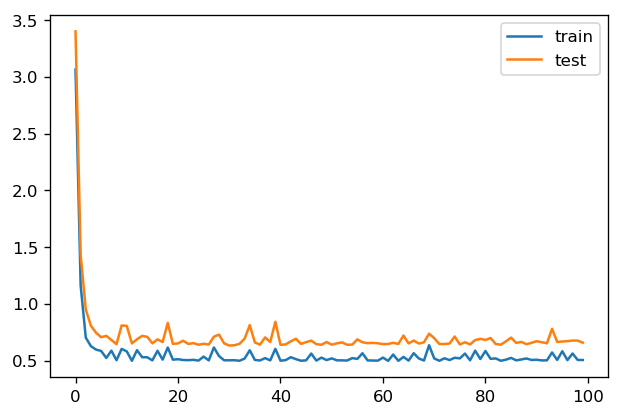

In [119]:
train(X_train, X_test, y_train, y_test)

****************************************************************************************************
train_Loss is:  [229.11256, 184.66168, 171.62694, 169.93521, 169.81363, 169.15326, 169.12518, 169.37535, 169.13385, 169.64497, 169.2164, 169.12128, 169.10538, 169.15512, 169.0957, 169.208, 169.11685, 169.11533, 169.14351, 169.26163, 169.19641, 169.13739, 169.31256, 169.1091, 169.11418, 169.3427, 169.09775, 169.21577, 169.51387, 169.41121, 169.36852, 169.16818, 169.45222, 169.22238, 169.50029, 169.12465, 169.38316, 169.59184, 169.61221, 171.24538, 170.69662, 170.65881, 169.53154, 169.66594, 170.63545, 170.5091, 169.47176, 169.17793, 169.66016, 169.33492, 169.16505, 169.105, 169.42403, 169.1119, 169.36928, 169.3476, 169.17165, 169.21559, 169.28932, 169.16315, 169.11703, 169.23788, 169.2367, 169.33217, 169.22652, 169.12598, 169.14044, 169.25494, 169.1328, 169.27078, 169.3257, 169.51967, 169.11934, 169.18002, 169.22417, 170.25285, 170.38707, 169.19, 169.66357, 169.46225, 169.15302, 169.1456

('learned weight', 
 [[30.52414]]
 <NDArray 1x1 @cpu(0)>, 'learned bias', 
 [-6.292049]
 <NDArray 1 @cpu(0)>)

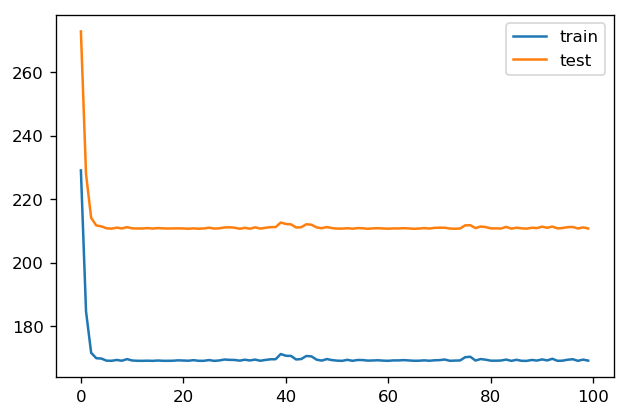

In [125]:
train(x[:num_train, :], x[num_train:,:], y_train, y_test)

****************************************************************************************************
train_Loss is:  [14.615499, 13.249659, 12.018142, 10.914152, 9.918149, 9.022372, 8.219263, 7.4939494, 6.8412075, 6.253628, 5.724559, 5.2499943, 4.8222604, 4.436589, 4.088704, 3.7747648, 3.4898808, 3.2340112, 3.0014722, 2.7912722, 2.601143, 2.4301062, 2.2750885, 2.1344738, 2.0059328, 1.890023, 1.7838066, 1.6871471, 1.5997697, 1.5200047, 1.4470942, 1.3797882, 1.3181465, 1.2616062, 1.2101328, 1.1622752, 1.1181588, 1.0774171, 1.0400879, 1.0050985, 0.9725988, 0.9426533, 0.9146894, 0.88852084, 0.8639809, 0.8409189, 0.8192001, 0.79870296, 0.7791206, 0.7607727, 0.7433477, 0.7266024, 0.7106581, 0.6954464, 0.6810414, 0.6671007, 0.65384674, 0.64109355, 0.6288038, 0.6168436, 0.60539186, 0.59422165, 0.5834107, 0.5729338, 0.56284094, 0.55302644, 0.5434734, 0.5341074, 0.5250407, 0.5161409, 0.5074585, 0.49898213, 0.49070066, 0.4826452, 0.47472122, 0.46696624, 0.45940602, 0.45199442, 0.44469672, 0.43757

('learned weight', 
 [[1.991494  2.1187363 2.2467759]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [0.43097836]
 <NDArray 1 @cpu(0)>)

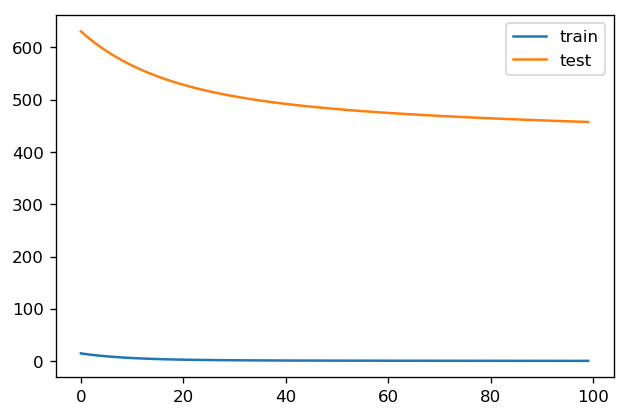

In [127]:
train(X_train[:2,:], X_test, y_train[:2], y_test)